In [1]:
#importing the required libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pickle
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [2]:
#Load the dataset
df=pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [4]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [5]:
#droping all the unwanted columns
df=df.drop(["area_type","availability","society","balcony"],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [6]:
#Handling missing values in Location column
df['location'].value_counts()  #as Whitefield is repeated for more times,we fill it with the same
df['location']=df['location'].fillna('Whitefield')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [7]:
#Handling missing values in size column
df['size'].value_counts()# as 2bhk repeated for more times, we fill it with the same
df['size']=df['size'].fillna('2 BHK')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [8]:
#Handling missing values in bath column
df['bath']=df['bath'].fillna(df['bath'].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [9]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [10]:
#cleaning size column
df['size'].unique()
out=[i.split()[0] for i in df['size']]
df['bhk']=out
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [11]:
#convert bhk column from object to int datatype
df['bhk']=df['bhk'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
 5   bhk         13320 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 624.5+ KB


In [12]:
#cleaning total_sqft
df['total_sqft'].unique()
def convert(a):
    l=a.split('-')
    if len(l)==2:
        return (float(l[0])+float(l[1]))/2
    try:
        return float(a)
    except:
        return None
df['total_sqft']=df['total_sqft'].apply(convert)
df['total_sqft']=df['total_sqft'].fillna(df['total_sqft'].median())
df.info()
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  float64
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
 5   bhk         13320 non-null  int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 624.5+ KB


In [13]:
df['price_per_sqft']=df['price']*100000/df['total_sqft']
df['price_per_sqft']

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
13319     3090.909091
Name: price_per_sqft, Length: 13320, dtype: float64

In [14]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [15]:
#cleaning location 
df['location']=df['location'].apply(lambda x:x.strip())
df['location'].value_counts()

location
Whitefield                              542
Sarjapur  Road                          399
Electronic City                         304
Kanakpura Road                          273
Thanisandra                             237
                                       ... 
Duddanahalli                              1
Doddanakunte                              1
Jogupalya                                 1
Subhash Nagar                             1
Kengeri Satellite Town KHB Apartment      1
Name: count, Length: 1294, dtype: int64

In [16]:
loaction_count=df['location'].value_counts()
loc_less_than_10=loaction_count[loaction_count<=10]
loc_less_than_10

location
Basapura                                10
Dairy Circle                            10
Nagappa Reddy Layout                    10
Naganathapura                           10
Sector 1 HSR Layout                     10
                                        ..
Duddanahalli                             1
Doddanakunte                             1
Jogupalya                                1
Subhash Nagar                            1
Kengeri Satellite Town KHB Apartment     1
Name: count, Length: 1053, dtype: int64

In [17]:
df['location']=df['location'].apply(lambda x:'Other' if x in loc_less_than_10 else x)
df['location'].value_counts()

location
Other                        2885
Whitefield                    542
Sarjapur  Road                399
Electronic City               304
Kanakpura Road                273
                             ... 
Tindlu                         11
Marsur                         11
2nd Phase Judicial Layout      11
Thyagaraja Nagar               11
HAL 2nd Stage                  11
Name: count, Length: 242, dtype: int64

In [18]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [19]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13320.000000,13320.000000,13320.000000,13320.000000,1.332000e+04
mean,1558.647202,2.688814,112.565627,2.802778,7.919404e+03
std,1236.376834,1.338754,148.971674,1.294496,1.062471e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266667e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.440000e+03
75%,1678.000000,3.000000,120.000000,3.000000,7.328359e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [20]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [21]:
df=df[(df['total_sqft']/df['bhk'])>=300]

In [22]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12568.000000,12568.000000,12568.000000,12568.000000,12568.000000
mean,1593.601347,2.559039,111.409518,2.650064,6313.436790
std,1259.484400,1.077715,151.916676,0.976813,4174.854291
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1117.750000,2.000000,49.000000,2.000000,4209.344773
50%,1300.000000,2.000000,70.000000,3.000000,5295.544522
75%,1700.000000,3.000000,115.000000,3.000000,6927.325006
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [23]:
#handling outliers in total_sqft
df=df[df['total_sqft']>=df['bhk']*300]
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12568.000000,12568.000000,12568.000000,12568.000000,12568.000000
mean,1593.601347,2.559039,111.409518,2.650064,6313.436790
std,1259.484400,1.077715,151.916676,0.976813,4174.854291
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1117.750000,2.000000,49.000000,2.000000,4209.344773
50%,1300.000000,2.000000,70.000000,3.000000,5295.544522
75%,1700.000000,3.000000,115.000000,3.000000,6927.325006
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


<Axes: ylabel='bath'>

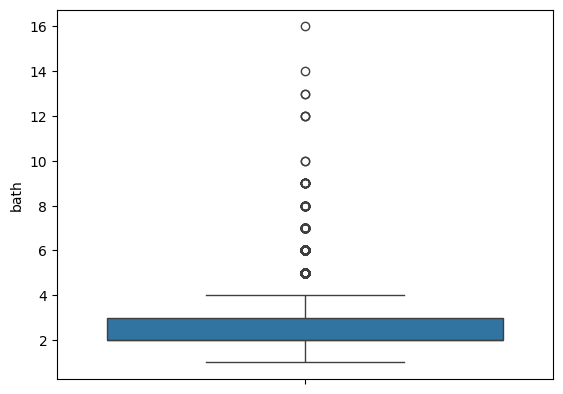

In [24]:
#handling outlier in bath
sns.boxplot(y='bath',data=df)

<Axes: ylabel='bath'>

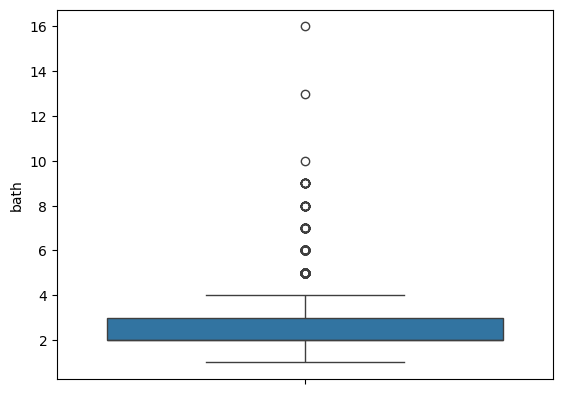

In [25]:
df=df[df['bath']<=df['bhk']]
sns.boxplot(y='bath',data=df)

<Axes: ylabel='bhk'>

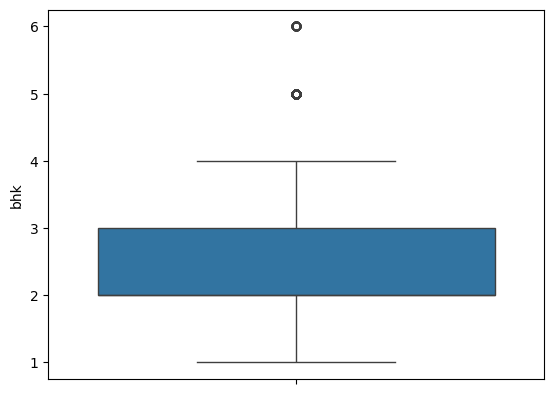

In [26]:
#handling outliers in bhk
df=df[df['bhk']<=6]
sns.boxplot(y='bhk',data=df)

<Axes: ylabel='price_per_sqft'>

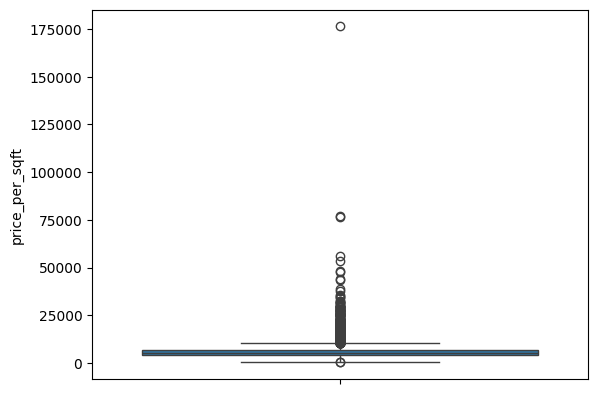

In [27]:
#handling outliers in price_per_sqft
sns.boxplot(y='price_per_sqft',data=df)

<Axes: ylabel='price_per_sqft'>

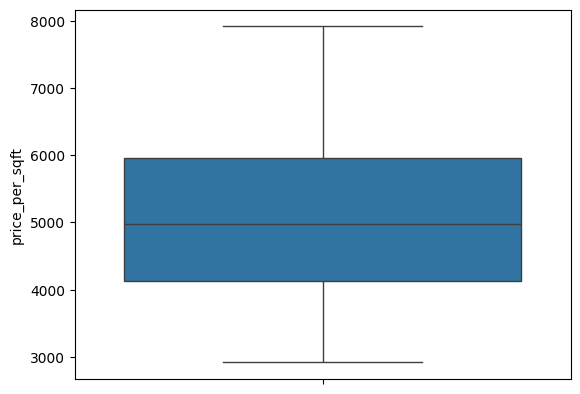

In [28]:
#handling outliers in price_per_sqr
q1=df['price_per_sqft'].quantile(0.25)
q3=df['price_per_sqft'].quantile(0.75)
IQR=q3-q1
low_boun=q1-0.5*IQR
up_boun=q3+0.5*IQR
df=df[(df['price_per_sqft']>=low_boun)&(df['price_per_sqft']<=up_boun)]
sns.boxplot(y='price_per_sqft',data=df)

In [29]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248


In [30]:
df=df.drop(['size','price_per_sqft'],axis=1)
df.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
5,Whitefield,1170.0,2.0,38.00,2


In [31]:
df.shape


(9522, 5)

In [32]:
df.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
5,Whitefield,1170.0,2.0,38.00,2


In [33]:
df.reset_index(inplace=True)
df=df.drop('index',axis=1)

In [34]:
copied_dataset=df.copy()
from sklearn.preprocessing import LabelEncoder
obj=LabelEncoder()
df['location']=obj.fit_transform(df['location'])
df.head()

,location,total_sqft,bath,price,bhk
0,78,1056.0,2.0,39.07,2
1,226,1440.0,2.0,62.00,3
2,158,1521.0,3.0,95.00,3
3,150,1200.0,2.0,51.00,2
4,235,1170.0,2.0,38.00,2


In [35]:
copied_dataset

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Uttarahalli,1440.0,2.0,62.00,3
2,Lingadheeranahalli,1521.0,3.0,95.00,3
3,Kothanur,1200.0,2.0,51.00,2
4,Whitefield,1170.0,2.0,38.00,2
...,...,...,...,...,...
9517,Uttarahalli,1345.0,2.0,57.00,3
9518,Green Glen Layout,1715.0,3.0,112.00,3
9519,Whitefield,3453.0,4.0,231.00,5
9520,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2


In [36]:
X=df.drop('price',axis=1)
y=df['price']


In [37]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=42)

In [38]:
model=RandomForestRegressor(random_state=42)
params={
    "n_estimators":[100,150,200,250,300],
    "max_depth":[3,4,5,6]
}

In [39]:
grid=GridSearchCV(estimator=model,param_grid=params,cv=5)
grid.fit(Xtrain,ytrain)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [100, 150, 200, 250, 300]})

In [40]:
print('training efficiency:',grid.score(Xtrain,ytrain))
print('testing efficiency:',grid.score(Xtest,ytest))

training efficiency: 0.867338842041187
testing efficiency: 0.82311707868226


In [41]:
with open('RFmodel.pkl','wb') as file:
    pickle.dump(grid,file)


In [42]:
copied_dataset.to_csv('copied.csv')

In [44]:
import sklearn
sklearn.__version__

'1.6.1'